## Import packages

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import numpy as np

## General Plot Parameters

In [2]:
# Plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

## Load Team Data

In [3]:
# Load team data
filename = './epl2020.csv'
data_epl = pd.read_csv(filename)

In [4]:
data_epl.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

## Get Unique Team Names

In [5]:
# Get unique team names
teams = data_epl.teamId.unique()

## Team Colors

In [6]:
team_colors = {'Arsenal':'#ef0107', 'Aston Villa':'#95bfe5', 'Bournemouth':'#da291c', 'Brighton':'#0057b8',
               'Burnley':'#6c1d45', 'Chelsea':'#034694', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
               'Leicester':'#003090', 'Liverpool':'#c8102e', 'Man City':'#6cabdd', 'Man Utd':'#da291c',
               'Newcastle United':'#241f20', 'Norwich':'#fff200', 'Sheffield United':'#ee2737', 
               'Southampton':'#d71920', 'Tottenham':'#132257', 'Watford':'#fbee23', 'West Ham':'#7a263a',
               'Wolves':'#fdb913'}

## Plot Color Swatches

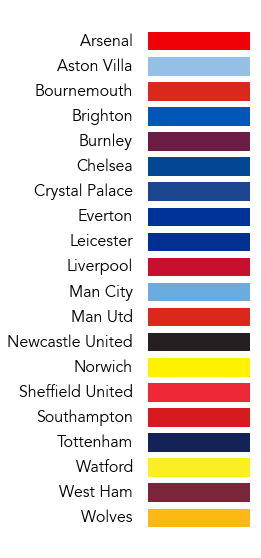

In [7]:
# Create figure
fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111, facecolor='white')

# Plot color swatches
y_val = 0
for team in sorted(teams, reverse=True):
    ax.fill_between([0, 1], y_val + 0.1, y_val + 0.8, color=team_colors[team])
    y_val += 1

# Remove x-ticks
ax.set_xticks([])

# Set y-ticks to team names
ax.set_yticks(np.arange(0.5, 20, 1))
ax.set_yticklabels(sorted(teams, reverse=True))

plt.show()

## Get Actual and Expected Point Totals

In [12]:
# Get the actual and expected points for each team
actual_pts = {}
expected_pts = {}
for team in teams:
    actual_pts[team] = data_epl[data_epl['teamId'] == team].pts.sum()
    expected_pts[team] = data_epl[data_epl['teamId'] == team].xpts.sum()

## Sort By Points Difference

In [13]:
pts_difference = {team: actual_pts[team] - expected_pts[team] for team in teams}
sorted_teams = sorted(pts_difference.keys(), key=pts_difference.get)

## Plot Point Difference

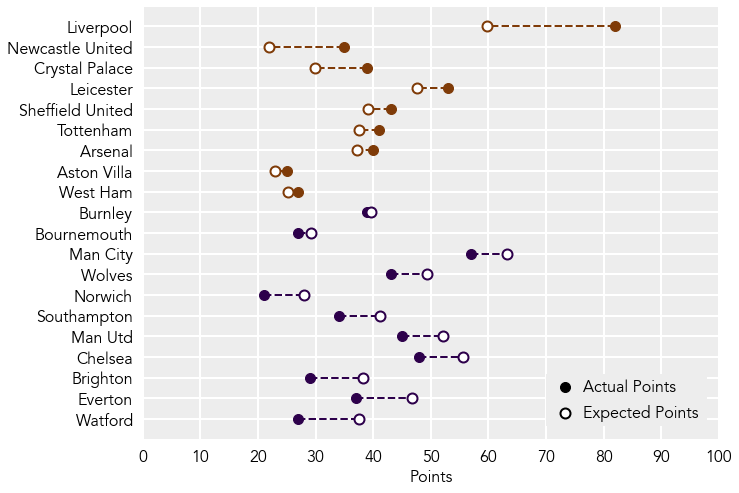

In [14]:
# Create figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1])

# Get colors
colors = plt.get_cmap('PuOr', 2)

# Create data points and connect them with a dashed line
yval = 0
for team in sorted_teams:
    if actual_pts[team] > expected_pts[team]:
        fill_color = colors(0)
    else:
        fill_color = colors(1)

    ax.plot([actual_pts[team], expected_pts[team]], [yval, yval], linestyle='--', linewidth=2, color=fill_color)
    ax.plot(actual_pts[team], yval, 'o', color=fill_color, markersize=10)
    ax.plot(expected_pts[team], yval, 'o', color='white', markeredgecolor=fill_color, markeredgewidth=2, markersize=10)
    yval += 1

# Add grid
ax.grid(color='white', linewidth=2)

# Points labels
ax.set_xticks(np.arange(0, 110, 10))

# Team labels
ax.set_yticks(np.arange(0, len(sorted_teams), 1))
ax.set_yticklabels(sorted_teams)

# Set axis limits
ax.set_xlim(0, 100)

# Set axis labels
ax.set_xlabel('Points')

# Add legend with inset
leg = fig.add_axes([0.7, 0.03, 0.28, 0.12])
leg.plot([0], [1], 'o', color='black', markersize=10)
leg.text(0.3, 1, 'Actual Points', ha='left', va='center')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Expected Points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

plt.show()

## Load Player Data

In [15]:
# Load player data
filename_players = './players_1920.csv'
data_pl = pd.read_csv(filename_players)

In [16]:
data_pl.columns

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team'],
      dtype='object')

## Get Unique Players

In [17]:
players = data_pl.full.unique()

## Get Player Assists and Goals

In [18]:
player_assists = {}
player_goals = {}
for player in players:
    mins = data_pl[data_pl['full'] == player].minutes.sum()/90.
    if mins >= 10:
        player_assists[player] = data_pl[data_pl['full'] == player].assists.sum()/mins
        player_goals[player] = data_pl[data_pl['full'] == player].goals_scored.sum()/mins

In [19]:
top_players_goals = sorted(player_goals.keys(), key=player_goals.get, reverse=True)[:20]
top_players_assists = sorted(player_assists.keys(), key=player_assists.get, reverse=True)[:20]

## Update Player Name Format

In [20]:
updated_names = {}
for player in players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '. ' + split_name[-1]

# Update certain player names
updated_names['Sergio Ag?ero'] = 'S. Agüero'
updated_names['Sadio Man?'] = 'S. Mané'
updated_names['Ra?l Jim?nez'] = 'R. Jiménez'
updated_names['Nicolas P?p?'] = 'N. Pépé'
updated_names['Emiliano Buend?a'] = 'E. Buendía'
updated_names['Adama Traor?'] = 'A. Traoré'
updated_names['Pascal Gro?'] = 'P. Groß'
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

## Plot Data for Top 20 Goalscorers

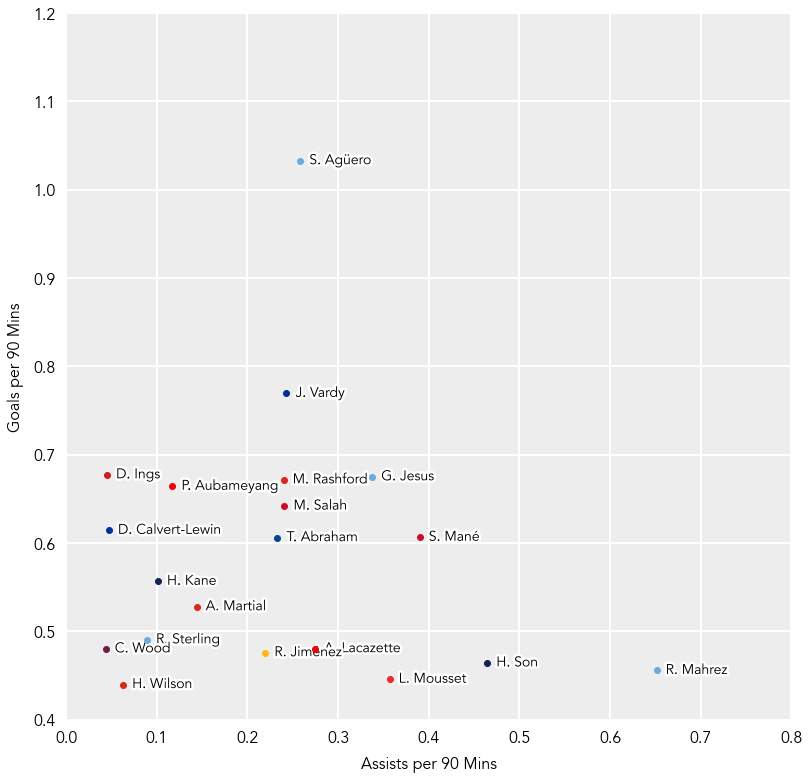

In [21]:
# Create Figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot player data
for player in top_players_goals:
    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1.2)

plt.show()

## Plot Data for Top 20 Assisters

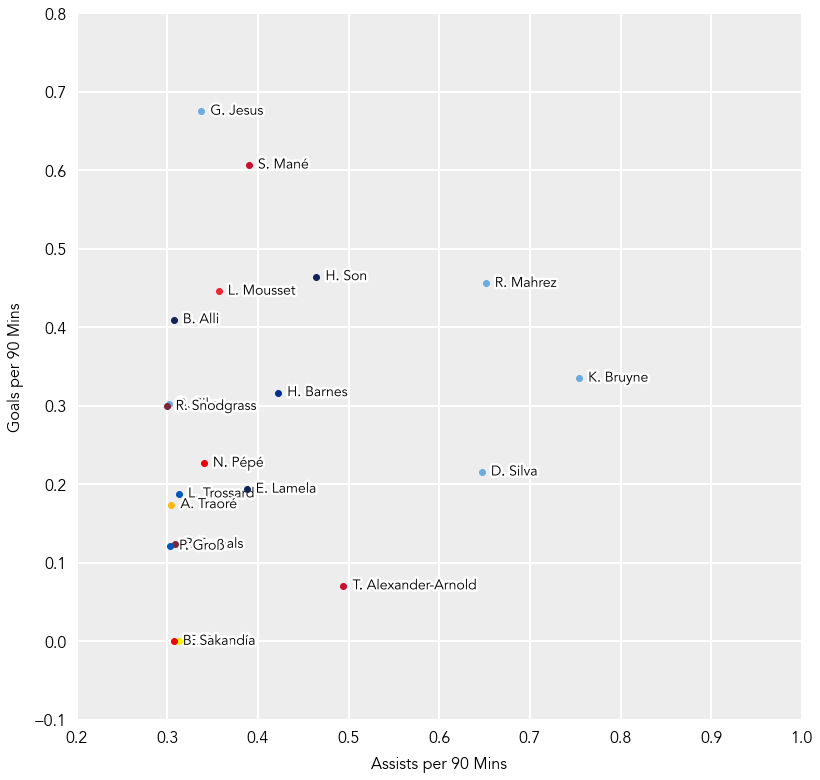

In [22]:
# Create Figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot player data
for player in top_players_assists:
    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 0.8)

plt.show()

## Get Yellow Cards per Team

In [19]:
team_yellows = {}
team_reds = {}

for team in teams:
    team_yellows[team] = data_pl[data_pl['team'] == team].yellow_cards.sum()
    team_reds[team] = data_pl[data_pl['team'] == team].red_cards.sum()

In [20]:
top_teams_yellows = sorted(team_yellows.keys(), key=team_yellows.get)

## Plot Yellow Cards

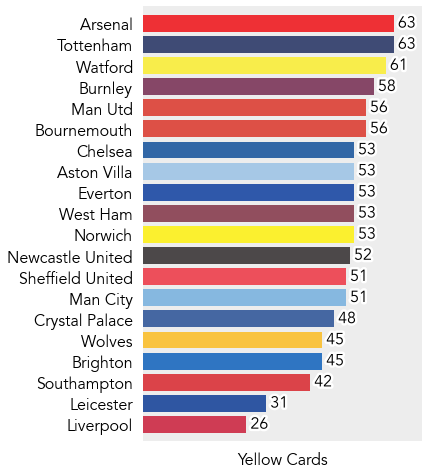

In [47]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

y_val = 0
for team in top_teams_yellows:
    ax.barh(y_val, team_yellows[team], color=team_colors[team], alpha=0.8)
    text = ax.text(team_yellows[team] + 1, y_val, team_yellows[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val += 1

# Remove x-ticks
ax.set_xticks([])

# Set y-ticks to team names
ax.set_yticks(np.arange(0, 21, 1))
ax.set_yticklabels(top_teams_yellows)

# Set x-axis label
ax.set_xlabel('Yellow Cards', labelpad=10)

# Set axis limits
ax.set_xlim(0, 70)
ax.set_ylim(-0.8, 19.8)

plt.show()

## Get Team Creativity

In [22]:
team_creativity = {}

for team in teams:
    team_creativity[team] = data_pl[data_pl['team'] == team].creativity.sum()

In [23]:
top_teams_creativity = sorted(team_creativity.keys(), key=team_creativity.get)

## Plot Team Creativity

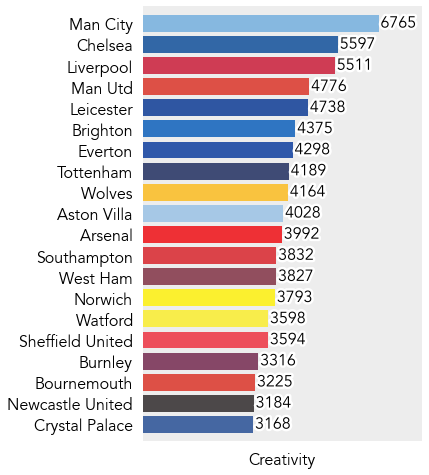

In [48]:
# Create figure
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

# Plot creativity as horizontal bars
y_val = 0
for team in top_teams_creativity:
    ax.barh(y_val, team_creativity[team], color=team_colors[team], alpha=0.8)
    text = ax.text(team_creativity[team] + 50, y_val, '%i' % team_creativity[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val += 1

# Remove x-ticks
ax.set_xticks([])

# Set y-ticks to team names
ax.set_yticks(np.arange(0, 21, 1))
ax.set_yticklabels(top_teams_creativity)

# Set x-axis label
ax.set_xlabel('Creativity', labelpad=10)

# Set axis limits
ax.set_xlim(0, 8000)
ax.set_ylim(-0.8, 19.8)

plt.show()

## Get Goalkeeper Saves and Clean Sheets

In [23]:
gk_saves = {}
gk_cleansheets = {}
for player in players:
    mins = data_pl[data_pl['full'] == player].minutes.sum()/90.
    if mins >= 10:
        gk_saves[player] = data_pl[data_pl['full'] == player].saves.sum()/mins
        gk_cleansheets[player] = data_pl[data_pl['full'] == player].clean_sheets.sum()

In [24]:
top_gks_saves = sorted(gk_saves.keys(), key=gk_saves.get, reverse=True)[:22]

In [25]:
top_gks_saves

['Hugo Lloris',
 'Martin Dubravka',
 'Bernd Leno',
 'Aaron Ramsdale',
 'Tim Krul',
 'Tom Heaton',
 'Vicente Guaita',
 'Paulo Gazzaniga',
 'Mathew Ryan',
 'Lukasz Fabianski',
 'Ben Foster',
 'Nick Pope',
 'Alex McCarthy',
 'Angus Gunn',
 'Kasper Schmeichel',
 'Rui Pedro dos Santos Patr?cio',
 'Dean Henderson',
 'David de Gea',
 'Jordan Pickford',
 'Alisson Ramses Becker',
 'Ederson Santana de Moraes',
 'Kepa Arrizabalaga']

## Plot Goalkeeper Saves and Clean Sheets

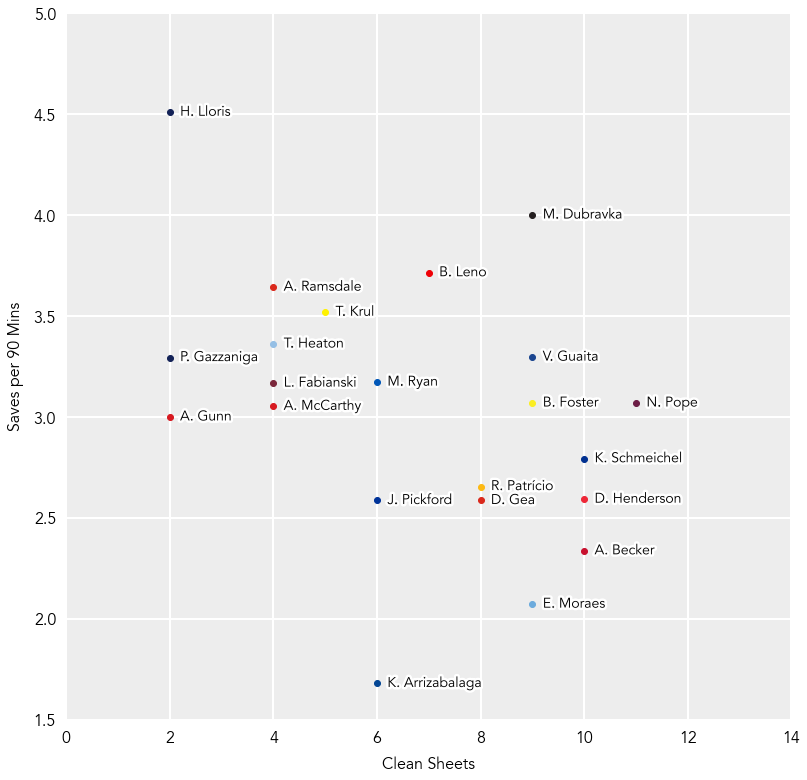

In [26]:
# Create figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot GK data
for gk in top_gks_saves:
    team = data_pl[data_pl['full'] == gk].team.iloc[0]
    ax.plot(gk_cleansheets[gk], gk_saves[gk], 'o', color=team_colors[team], zorder=3)
    text = ax.text(gk_cleansheets[gk] + 0.2, gk_saves[gk], updated_names[gk], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis label
ax.set_xlabel('Clean Sheets', labelpad=10)
ax.set_ylabel('Saves per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 14)
ax.set_ylim(1.5, 5)

plt.show()